### An Introduction to Preventive Maintenance using Call Centre Data

In [1]:
import pandas as pd
import warnings
data = pd.read_csv('Call centre logs.csv')
data.head()

,Comments
0,Needs a large recycling bin on wheels
1,Please lower the temp in the 5th floor northe...
2,hand sanitizer dispensers in the main lobby n...
3,Category: Temperature Issue - Too Cold ; Floo...
4,"NE Corner office, current temp 25.9 degrees. ..."


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7366 entries, 0 to 7365
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  7366 non-null   object
dtypes: object(1)
memory usage: 57.7+ KB


In [27]:
data.describe()

,Comments
count,7366
unique,7356
top,"In the men's washroom, the handpaper machine n..."
freq,3


In [38]:
from pycaret.nlp import *
call_logs = setup(data = data, target = 'Comments', session_id = 123,
                                    custom_stopwords = ['see', 'front', 'thank', 'client', 'man', 'woman', 'category', 'need', 
                                       'desk', 'properly','come', 'floor', 'issue', 'assisit', 'would', 'office'])

Description,Value
session_id,123
Documents,7366
Vocab Size,2454
Custom Stopwords,True


In [39]:
comments = create_model('lda', num_topics = 5, multi_core = True) 

In [40]:
warnings.filterwarnings('ignore')
plot_model(comments, plot='topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.185883  0.251272       1        1  23.895380
1     -0.033692 -0.352644       2        1  21.759233
2     -0.323820 -0.072689       3        1  21.702658
0     -0.168216  0.298413       4        1  17.884672
3      0.339845 -0.124352       5        1  14.758057, topic_info=          Term         Freq        Total Category  logprob  loglift
22    washroom  1296.000000  1296.000000  Default  30.0000  30.0000
7         room   890.000000   890.000000  Default  29.0000  29.0000
4        light   710.000000   710.000000  Default  28.0000  28.0000
14        cold   614.000000   614.000000  Default  27.0000  27.0000
20       paper   524.000000   524.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
529       look    32.101683    60.042682   Topic5  -5.0816   1.2872
125       keep    28.384681    46.954601   Topic5  -5.2046   1.4100
3           fl    65.840596   375.688641   Topic5  -4.3633   0.1719
36    elevator    56.863563   302.278386   Topic5  -4.5098   0.2427
1092    assist    46.242627   179.733399   Topic5  -4.7166   0.5558

[241 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
24        4  0.995030       adjust
461       1  0.725462       advise
461       4  0.271156       advise
261       4  0.995550          air
1525      5  0.973997    alternate
...     ...       ...          ...
30        1  0.630549         work
30        2  0.270235         work
30        4  0.099490         work
212       2  0.995774      working
226       4  0.987858  workstation

[255 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])

In [35]:
# Assign model
call_log_results = assign_model(comments)
call_log_results.head()

,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic,Perc_Dominant_Topic
0,large recycling wheel,0.050000,0.050000,0.050000,0.799998,0.050000,Topic 3,0.80
1,low temp northern light training room fl,0.332793,0.025628,0.590783,0.025793,0.025003,Topic 2,0.59
2,dispenser main lobby refill,0.040141,0.440022,0.238924,0.240738,0.040175,Topic 1,0.44
3,temperature cold fl,0.799674,0.050157,0.050168,0.050000,0.050000,Topic 0,0.80
4,current temp degree temperature hot fl,0.578061,0.028634,0.336026,0.028702,0.028577,Topic 0,0.58


In [7]:
dominant_topics = call_log_results
with pd.option_context('display.max_colwidth', None):
    display(dominant_topics)

,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Dominant_Topic,Perc_Dominant_Topic
0,large recycling wheel,0.031250,0.031250,0.031250,0.031250,0.781249,0.031250,0.031250,0.031250,Topic 4,0.78
1,low temp floor northern training room floor floor,0.474244,0.013891,0.013909,0.297144,0.013897,0.159110,0.013899,0.013906,Topic 0,0.47
2,dispenser main lobby refill,0.025001,0.025001,0.025001,0.025069,0.025001,0.424924,0.025001,0.425003,Topic 7,0.43
3,temperature issue cold floor floor,0.854123,0.020833,0.020833,0.020843,0.020838,0.020841,0.020841,0.020847,Topic 0,0.85
4,current temp degree temperature issue hot floor floor,0.780425,0.013890,0.013890,0.013894,0.013892,0.013902,0.136213,0.013896,Topic 0,0.78
...,...,...,...,...,...,...,...,...,...,...,...
7361,work main floor auditorium request turn,0.017872,0.017876,0.017872,0.017863,0.017861,0.874902,0.017863,0.017891,Topic 5,0.87
7362,pipe stop work advise,0.025001,0.025002,0.025067,0.424988,0.025001,0.424912,0.025001,0.025029,Topic 3,0.42
7363,phone recipient email,0.031250,0.281249,0.031250,0.031250,0.031250,0.531250,0.031250,0.031250,Topic 5,0.53
7364,floor washroom urinal clog report danielle,0.017876,0.017920,0.017858,0.345684,0.017862,0.017865,0.547014,0.017921,Topic 6,0.55


In [7]:
dominant_topics = call_log_results
with pd.option_context('display.max_colwidth', None):
    display(dominant_topics)

,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Dominant_Topic,Perc_Dominant_Topic
0,large recycling wheel,0.031250,0.031250,0.031250,0.031250,0.781249,0.031250,0.031250,0.031250,Topic 4,0.78
1,low temp floor northern training room floor floor,0.474244,0.013891,0.013909,0.297144,0.013897,0.159110,0.013899,0.013906,Topic 0,0.47
2,dispenser main lobby refill,0.025001,0.025001,0.025001,0.025069,0.025001,0.424924,0.025001,0.425003,Topic 7,0.43
3,temperature issue cold floor floor,0.854123,0.020833,0.020833,0.020843,0.020838,0.020841,0.020841,0.020847,Topic 0,0.85
4,current temp degree temperature issue hot floor floor,0.780425,0.013890,0.013890,0.013894,0.013892,0.013902,0.136213,0.013896,Topic 0,0.78
...,...,...,...,...,...,...,...,...,...,...,...
7361,work main floor auditorium request turn,0.017872,0.017876,0.017872,0.017863,0.017861,0.874902,0.017863,0.017891,Topic 5,0.87
7362,pipe stop work advise,0.025001,0.025002,0.025067,0.424988,0.025001,0.424912,0.025001,0.025029,Topic 3,0.42
7363,phone recipient email,0.031250,0.281249,0.031250,0.031250,0.031250,0.531250,0.031250,0.031250,Topic 5,0.53
7364,floor washroom urinal clog report danielle,0.017876,0.017920,0.017858,0.345684,0.017862,0.017865,0.547014,0.017921,Topic 6,0.55


In [36]:
plot_model(comments, plot = 'topic_distribution')

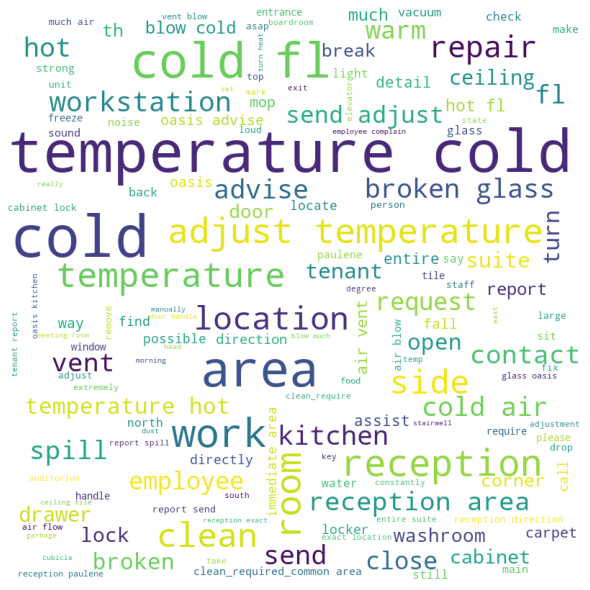

In [41]:
plot_model(comments, plot='wordcloud')

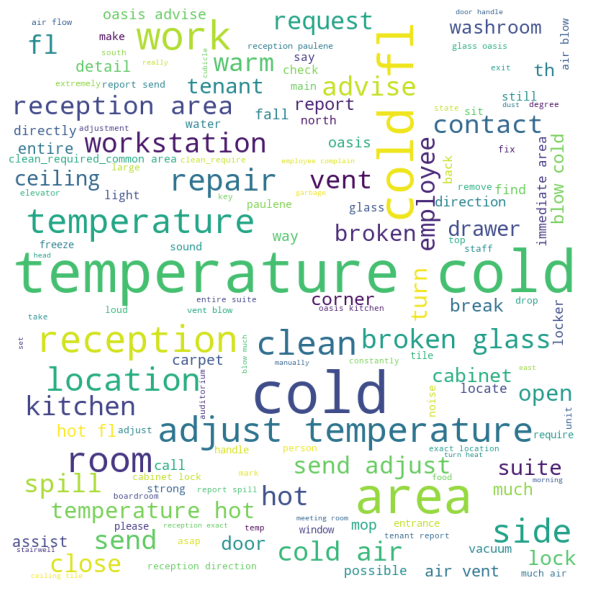

In [42]:
plot_model(comments, plot='wordcloud', topic_num = 'Topic 0')

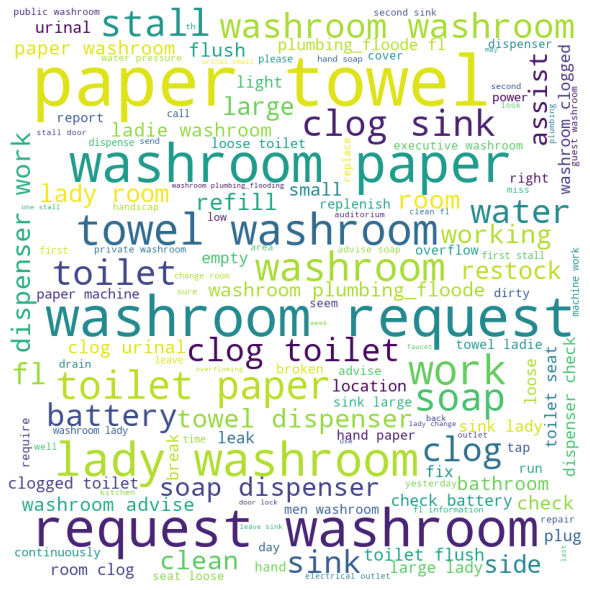

In [43]:
plot_model(comments, plot='wordcloud', topic_num = 'Topic 1')

In [22]:
plot_model(comments, plot='frequency')

In [44]:
plot_model(comments, plot='frequency', topic_num = 'Topic 2')

In [45]:
plot_model(comments, plot='bigram', topic_num = 'Topic 2')


In [46]:
plot_model(comments, plot='trigram', topic_num = 'Topic 2')

In [47]:
plot_model(comments, plot='sentiment', topic_num = 'Topic 2')

In [48]:
plot_model(comments, plot = 'tsne')

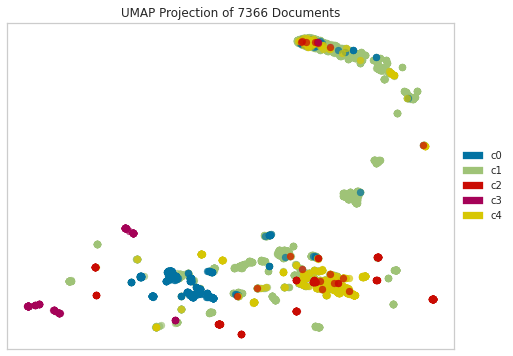

In [49]:
plot_model(comments, plot = 'umap')

In [19]:
evaluate_model(comments)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…